# Debates on a Burden: Exploring the Connotations of the Wehrmacht in Post-War German Politics

political history, parliamentary history, word embeddings, discourse analysis

This paper investigates the evolving connotations of the Wehrmacht in post-war German parliamentary politics. By analyzing term frequencies and comparing diachronic word embeddings on a corpus of German parliamentary debates, we measure prevalence and context of references to the Wehrmacht over time. The results show that the Wehrmacht went from being a prominent issue of defense and welfare policies to near irrelevance by the 1960s. They also indicate that the resurgent post-reunification controversies on the Wehrmacht’s war crimes did not mark a radical shift in political culture, but followed a decades-long trend of increasingly strong associations between the Wehrmacht, war crimes, and Nazism in political speech, that developed alongside an emerging culture of remembrance.

## Introduction

In the spring of 1997, the Bundestag, Germany’s federal legislature, allocated time across two sessions to debate the so-called Wehrmacht exhibition. This privately organized photo exhibition on the Wehrmacht's war crimes in Eastern Europe had caused months of public controversy. All major political parties sought to have the house pass resolutions reflecting their respective views on its interpretation. Initially, the scheduled debate unfolded as a predictable exchange between those fearing the collective defamation of all German soldiers and those wishing to symbolically acknowledge the war crimes. Contrary to expectations, however, the sessions took an emotional turn when members began tearing up during their remarks and speaking about their own family histories. At the time, this candid and empathetic debate was regarded as a great moment for the Bundestag and exemplary of the emergent culture of remembrance (Erinnerungskultur) in a reunified Germany.

Scholars have generally characterized post-war German Erinnerungskultur as having developed in multiple phases of varying intensity and focus. Following initial Allied efforts to confront Germans with the depravity of the Nazi regime, the 1950s and early 1960s are generally considered a period of relative silence on these issues. <cite id="dr80e"><a href="#zotero%7C14151639%2F7QQJR3JC">(Frei)</a></cite> has shown how the West German government worked to reintegrate Nazi criminals into society and public service; <cite id="wcqgv"><a href="#zotero%7C14151639%2FLRI43GXA">(Herf)</a></cite> identifies such efforts in both West and East Germany, though under different political theories. Only with the public interest in the Auschwitz trials in Frankfurt and the student protests of the late 1960s did a new period of remembrance begin, in which ideas for a more open acknowledgment of Nazi crimes and German responsibility gained public support (<cite id="5ianv"><a href="#zotero%7C14151639%2FPDU3FWY6">(Moses)</a></cite>). In the 1970s and 1980s, Erinnerungskultur began to take shape and became politically institutionalized.

Within the context of Erinnerungskultur, the Wehrmacht is usually seen as a special case. As the organization had pressed millions of Germans into service for the regime, pointing to the Wehrmacht’s culpability was much less popular than condemning the Nazi Party or the Waffen-SS. For the longest time, politicians, historians, and military experts continued to highlight the Wehrmacht's achievements, especially as its veterans were needed to facilitate West German rearmament (<cite id="u2t15"><a href="#zotero%7C14151639%2FL8AJKEW7">(Niven)</a></cite>). In popular culture, Nazi propaganda lived on through memoirs, novels, and movies that depicted German soldiers’ heroism, creating the lasting myth of the "clean" Wehrmacht — an army that fought honorably in a war supposedly detached from politics, ideology, or genocide (<cite id="aubrk"><a href="#zotero%7C14151639%2FNRU8Z9AJ">(Westemeier)</a></cite>). Only in the 1990s did the public begin openly debating the Wehrmacht's war crimes, with the Wehrmachtsausstellung and the related Bundestag debate seen as turning points in overcoming the Wehrmacht's myth.

There is, however, a lack of studies on political evaluations of the Wehrmacht in post-war German parliamentary politics. The Bundestag had considered the Wehrmacht numerous times before the 1997 debate. Its difficult legacy had long presented itself as a burden on German policymaking in the areas of social welfare and defense. Thus, its reappearance as a moral burden in the 1990s was not unprecedented. This raises the question of the extent to which the Bundestag's members engaged in the mythologization of the Wehrmacht before 1997 or had already shifted their rhetoric in response to the emerging Erinnerungskultur.

To examines how post-war German parliamentarians discussed the Wehrmacht and how the term’s meaning evolved in the course of national debates, this paper utilizes the proceedings of the Bundestag as its source data. Rather than relying on traditional qualitative approaches to discourse analysis, quantitative methods are employed to achieve a general overview of decades' worth of parliamentary exchanges. In addition to a computational analysis of term frequencies, this study focuses on distributional semantics, particularly on diachronic, dense word embeddings. These embeddings are employed to model the semantic relationships of terms in the Bundestag’s proceedings over time, enabling the tracing of shifts in the meaning of “Wehrmacht” in relation to other terms and concepts. The results gained from this analysis are evaluated by testing the model on comparable terms and referencing existing research on the topic.

## Data and methods

 The Bundestag has published its official proceedings, known as “Plenarprotokolle”, for all legislative periods dating back to 1949. These proceedings are an invaluable source for studying the contemporary history of (West) Germany, as they reflect all matters that required legislation in the Federal Republic and provide insights into the various positions held by lawmakers, members of the executive, and foreign dignitaries. As post-war political culture developed, the legislature also began to engage with broader societal debates without the intention of passing laws—the controversy surrounding the Wehrmacht exhibit being an example of such an intervention.

Unfortunaletly, the official digitization of the proceedings lack both structure and annotation. A custom Document Type Definition requires the entire text for each session, including lists, page numbers from the print version, and attachments, to be placed in a single tag without further annotation. Thus, there is no immediate way to distinguish actual parliamentary speeches from other information in the record. Various efforts have been made to build structured and annotated datasets from the data provided by the Bundestag: DeuParl collected proceedings from both the Bundestag and earlier German parliaments; the texts underwent preprocessing to normalize the words and exclude any extraneous attachments or name lists (<cite id="re86a"><a href="#zotero%7C14151639%2FZUFY8INE">(Walter et al.)</a></cite>). ParlSpeech compiled proceedings from multiple European parliaments, including the Bundestag, and employed regular expressions to detect individual speeches, speakers, an their respective party affiliations (<cite id="sd1ib"><a href="#zotero%7C14151639%2FIF394NFM">(Rauh and Schwalbach)</a></cite>). Similarly, GermaParl segmented the Bundestag’s proceedings into single speeches, along with speaker and party identification. By building multiple sets of regular expressions for the different styles used over time and developing automated checks for known problems, the project achieved consistent results available as TEI files (<cite id="d6cmb"><a href="#zotero%7C14151639%2FXRMKLZA2">(Blätte and Blessing)</a></cite>, <cite id="luzs1"><a href="#zotero%7C14151639%2FHRRUTTVB">(Blaette et al.)</a></cite>). OpenDiscourse has provided annotations of comparable quality and made them available through a web interface (<cite id="dd77c"><a href="#zotero%7C14151639%2F3JCW5D6S">(Richter et al.)</a></cite>). Additionally, some smaller corpora comprising partial Bundestag proceedings have been published.

For this analysis, GermaParl was selected for the high quality of its annotation and as the contained information can be easily parsed from TEI files. The latest available version of GermaParl (v2.0.0) encompasses all proceedings up to the 19th legislative period, concluding in 2021. To make the data more readily accessible in Python, the individual TEI files were parsed and condensed into a pandas DataFrame. Each row of the DataFrame holds one individual speech or utterance, as well as information on the speaker, the date, and the legislative period. In total, there are about 958,000 individual speeches and utterances by speakers.

In [ ]:
# The GermaParl data has been parsed into a pandas DataFrame with the following code. 
# To run, the parse_xml_to_df() needs to be passed the path to a directory containing GermaParl's TEI-XML files. These files can be obtained at Github: https://github.com/PolMine/GermaParlTEI
import xml.etree.ElementTree as ET
import pandas
import os

# Stage tags with comments and interjections placed within speeches' texts are removed.
def get_text_without_stage(element):
    text = ""
    for child in element:
        if child.tag == "stage":
            continue
        if child.text:
            text += child.text
        text += get_text_without_stage(child)
        if child.tail:
            text += child.tail
    if ':' in text:
      text = ' '.join(text.split(':')[1:])
      return text
    else:
      return text

# For each XML file, session and speech data are collected. Each individual speech is concatinated to a DataFrame as a single row. 
def read_xml(file_path):
    # Read the XML file
    try:
      tree = ET.parse(file_path)
      root = tree.getroot()
    except Exception as e:
      print('File broken: '+file_path)
      return
    # Get session data
    lp = int(root.find('.//legislativePeriod').text)
    session = int(root.find('.//sessionNo').text)
    date_tag = root.find('.//publicationStmt/date')
    year = int(ET.tostring(date_tag, encoding='unicode', method='text')[0:4])
    # Get speech data
    document_df = pandas.DataFrame(columns=['lp', 'session', 'year', 'name', 'role', 'party', 'text'])
    for sp_tag in root.findall(".//sp"):
        name = sp_tag.get("name").replace('"', '').replace("'", '')
        party = sp_tag.get("party")
        role = sp_tag.get("role")
        text = get_text_without_stage(sp_tag)
        new_row_data = {
          'lp': lp,
          'session': session,
          'year': year,
          'name': name,
          'role': role,
          'party': party,
          'text': text
          }
        document_df = document_df._append(new_row_data, ignore_index=True)
    return document_df

# All XML files in the directory are detected and passed to a reading function.
def parse_xml_to_df(directory):
    df = pandas.DataFrame(columns=['lp', 'session', 'year', 'name', 'role', 'party', 'text'])	
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".xml"):
                file_path = os.path.join(root, file)
                document_df = read_xml(file_path)
                df = pandas.concat([df, document_df], ignore_index=True)
    return df

# This Function is called on a directory assumed to contain GermaParl's TEI-XML files of the Bundestag's records.
bundestag_data = parse_xml_to_df("./")


In [7]:
# Due to size constraints, a sample of 10,000 rows of the original data is provided to demonstrate the resulting DataFrame.
bundestag_data = pandas.read_csv("./data/bundestag_data_sample.csv")

# The data can be explored as any pandas DataFrame.
print(bundestag_data)


      lp  session  year                   name      party  \
0     19      174  2020      Wolfgang Schäuble        CDU   
1     12      235  1994        Friedrich Vogel        CDU   
2     11      130  1989       Annemarie Renger        SPD   
3     14       85  2000             Anke Fuchs        SPD   
4      2       24  1954           Käte Strobel        SPD   
...   ..      ...   ...                    ...        ...   
9995  19      206  2021       Alexander Ulrich  DIE LINKE   
9996   7      200  1975     Kai-Uwe von Hassel        CDU   
9997  12       78  1992         Klaus Beckmann        FDP   
9998  16      172  2008  Katrin Göring-Eckardt     GRUENE   
9999  11      203  1990         Heinz Westphal        SPD   

                                                   text  \
0     Jetzt erteile ich das Wort dem Kollegen Stepha...   
1                              Ja, bitte, Herr Ullmann.   
2            Zusatzfrage, Herr Abgeordneter Seidenthal.   
3                              

### Term frequencies

The initial step in examining the discussions of the Wehrmacht in the Bundestag is to explore when this term was mentioned and by whom. A frequency analysis allows to investigate trends in the term’s prominence over time. To this end, both the absolute frequency and relative frequency of the term “Wehrmacht” are determined based on the year and the speaker’s party affiliation. The absolute frequency refers to the raw number of instances of the term in a given legislative period, indicating its frequency of use and distribution across parties. This number is juxtaposed with the total count of tokens in that period’s debates to derive the relative frequency.

When counting the mentions of the Wehrmacht, all tokens including “wehrmacht” as a substring are considered. This way, the process can account for commonly occurring German compound words such as “Wehrmachtsangehöriger” (member of the Wehrmacht) or “Wehrmachtsaustellung” (Wehrmacht exhibition), which consequently will be counted as separate mentions of the Wehrmacht itself. The frequency analysis is also crucial in informing the subsequent analytical steps. In time frames with very low frequencies, a term's relation cannot be modeled reliably.

In [3]:
# Wehrmacht mentions can be counted from the "text" data in the DataFrame.

# A function is defined to count the occurrences of the substring "wehrmacht" in the lowercased text.
def count_wehrmacht_occurrences(text):
    return text.lower().count('wehrmacht')

# This function is applied to the DataFrame's "text" column. The results for each row are stored in a new column "wehrmacht_occurrences".
bundestag_data['wehrmacht_occurrences'] = bundestag_data['text'].apply(count_wehrmacht_occurrences)

# The new column "wehrmacht_occurrences" can be used to count or visualize mentions of the Wehrmacht over time and in relation to speakers and parties.

### Word embedding neighbors

After conducting the frequency analysis, word embeddings are utilized to explore the contexts in which the Wehrmacht is referenced in the Bundestag’s proceedings. Word embeddings model the sematic relations among words in a corpus by generating vector representations for each word. The underlying hypothesis for generating such representations is usually traced to <cite id="abatm"><a href="#zotero%7C14151639%2FMWWNWK4E">(Harris)</a></cite> and <cite id="h65rg"><a href="#zotero%7C14151639%2FN4FJ8GEU">(Firth)</a></cite>. A prevalent method for reducing these representations to vectors of a fixed length is Word2Vec by <cite id="pt1mk"><a href="#zotero%7C14151639%2FT7BAQ5QY">(Mikolov et al.)</a></cite>. Once vector representations for words in a corpus are derived, the cosine similarity between two vectors indicates the semantic similarity between the words they represent in the underlying corpus. Compared to more recent contextualized embeddings, these word embeddings can be trained on smaller corpora with fewer computational resources while remaining easier to interpret, making them attractive for applications in the humanities.

Word embeddings have been utilized in historical research in multiple ways. Usually, a corpus is split into multiple time frames to create corresponding diachronic word embeddings. <cite id="3obd9"><a href="#zotero%7C14151639%2FRDU75PYH">(Kutuzov et al.)</a></cite> surveyed the emergence and different adaptations of this approach. <cite id="x19xg"><a href="#zotero%7C14151639%2FQ8S2TH8X">(Wevers and Koolen)</a></cite> discussed the technique’s application to historical questions. Specifically, they outlined how tracing the semantic change of terms through word embeddings can assist historians in understanding how cultural concepts evolve.

Several works touched on the application of diachronic word embeddings to the Bundestag’s proceedings. However, these primarily concentrate on refining and evaluating the method rather than building on existing historical research. For example, <cite id="xdwh9"><a href="#zotero%7C14151639%2FXRMKLZA2">(Blätte and Blessing)</a></cite> illustrated how word embeddings can show the distinct use of specific terms by representatives of different parties. <cite id="poho8"><a href="#zotero%7C14151639%2FZUFY8INE">(Walter et al.)</a></cite> incorporated word embeddings as part of a method to quantify political bias, estimating both antisemitic and anti-communist inclinations in German parliamentary proceedings. Similarly, <cite id="xppoh"><a href="#zotero%7C14151639%2FE3EMQPEU">(Beese et al.)</a></cite> integrated word embeddings into a method to infer the support for migration and women’s rights within German parliaments.

The straightforward approach suggested by <cite id="j97bh"><a href="#zotero%7C14151639%2FXRMKLZA2">(Blätte and Blessing)</a></cite> is employed first. To demonstrate the changes in the usage of the term “Wehrmacht” over time, multiple diachronic word embedding models are trained, and comparisons are made between the nearest neighbors of the term’s vectors across these models. Prior to training, preprocessing steps are applied: All tokens in the corpus are lemmatized and converted to lowercase. This preprocessed data is stored in the DataFrame's "preprocessed_text" column. Utterances containing fewer than ten tokens are removed from the training data, as these tend to be short, often repetitive, procedural statements not pertinent to the debate’s subject.
The training itself utilizes the Word2Vec implementation within the Gensim framework <cite id="zue6b"><a href="#zotero%7C14151639%2F6Z7Z6KQJ">(Řehůřek and Sojka)</a></cite>. To enable the models to learn a wider context of term usage, the window parameter is increased to ten. Skip-Gram is used as the training method, all other parameters are set to default.

In [ ]:
# Diachronic word embeddings are trained in the Word2Vec implementation of the Gensim library. 
# Gensim is an open-source Python library offering implementations of various unsupervised methods employed in corpus linguistics. 
# These include word embedding methods like FastText and Word2Vec and topic modelling methods like LSI and LDA.   
import gensim
from gensim.models import Word2Vec

# A diachronic slice of the preprocessed text data is selected and filtered from the DataFrame. 
# Here the selection is made by legislative period. If desired, it is also possible to divide the data by years, speakers, parties, etc.
# Short utterances with less than 10 words are not included.
lps_to_include = [1, 2, 3]
filtered_data = bundestag_data[bundestag_data['lp'].isin(lps_to_include) & bundestag_data['preprocessed_text'].apply(lambda x: len(x) > 10)]

# The preprocessed text of the filtered data is transformed into a list of token lists, as required by Gensim.
tokenized_lists = [text.lower().split() for text in filtered_data['preprocessed_text']]

# An embedding model is trained on the token lists.
# Various parameters may be set here to influence the training. The window parameter has been increased from the default value to capture larger context windows. 
embedding_model = Word2Vec(tokenized_lists, window = 10)

In [1]:
# As an alternative to training a new model, we supply a pretrained model of the legislative periods one through three to explore here.
# The following lines of code may be run to load the pretrained model. Notice that the same variable as in the preceding block is used.
import gensim
from gensim.models import Word2Vec

embedding_model = Word2Vec.load('./pretrained_models/pretrained_model.model')

In [2]:
# Looking at a term's nearest neighbors within a word embedding model is done by a Gensim method.
# Here, the ten closest vectors to the "wehrmacht" vector by cosine similarity are determined.
# Instead of "wehrmacht", any other term included in the model may be analyzed.
nearest_neighbors = embedding_model.wv.most_similar('wehrmacht', topn = 10)

# Both the terms and cosine similarities can be displayed.
for neighbor in nearest_neighbors: print(neighbor)

('heer', 0.7875537276268005)
('soldat', 0.7799506783485413)
('bundeswehr', 0.7696952819824219)
('offizier', 0.7652694582939148)
('armee', 0.7642293572425842)
('freiwilligen', 0.7570810317993164)
('reichswehr', 0.756397545337677)
('marine', 0.7452843189239502)
('berufssoldat', 0.7283650636672974)
('unteroffizier', 0.6986606121063232)


### Semantic shifts

Beyond extracting the nearest neighbors of a given word, word embeddings also facilitate tracing its semantic change relative to other words. A common approach is measuring a word’s cosine similarity to a target word in multiple diachronic embeddings. If the similarity changes over time, the sematic relation to the target term has shifted (<cite id="uhs8k"><a href="#zotero%7C14151639%2F3SEU37HH">(Hamilton et al.)</a></cite>). This can be enhanced through the word’s nearest neighbors, by comparing each neighbor to the target word, providing a better indication of how the word’s usage changed. For instance, <cite id="pwfv9"><a href="#zotero%7C14151639%2F39YRTY2K">(Lange and Futselaar)</a></cite> compared the semantic changes in words for war criminals as expressed in their relations to political concepts in a Dutch parliamentary corpus. To capture entire concepts rather than just single target terms, they also combined multiple vectors associated with a concept into a new target vector. The authors later utilized the same approach of combining word vectors as part of a workflow designed to study changes in the vocabulary of Dutch nuclear armament debates <cite id="c7tar"><a href="#zotero%7C14151639%2FU6JPF8MS">(Futselaar and Lange)</a></cite>. It is also possible to compare the vectors of a word to itself over time in order to reveal semantic changes. However, this requires aligning the diachronic embeddings. <cite id="f2s26"><a href="#zotero%7C14151639%2FQ8S2TH8X">(Wevers and Koolen)</a></cite> showed how changes in self similarity can indicate semantic change, particularly in combination with a frequency analysis.

To assess the relevant shifts of the term “Wehrmacht” in the Bundestag’s proceedings, the cosine similarities of its nearest neighbors (n = 100) to certain concepts are compared across diachronic word embeddings. The number of nearest neighbors was determined through experimentation. When increasing the number beyond thirty, further increments did not alter the relative distance between concepts. However, examining several hundred or even a thousand neighbors reduced the absolute average values, as increasingly remote neighbors were included. Instead of comparing the neighbors against simple target term for each concept, concept vectors will be calculated by averaging the vectors of multiple terms associated with a concept. As target concepts “Kriegsverbrechen” (war crimes) and “Nationalsozialismus” (Nazism) are chosen. Employing war crimes as a point of comparison allows to examine whether the Wehrmacht became more strongly associated with atrocities and improper military conduct over time. It is also an indicator for the association of the Wehrmacht with genocidal actions, as the post-war German public lacked a consistent word for the Shoah until at least the 1970s. Similarly, Nazism is used as a target term to estimate how the conceptual relation between the Wehrmacht on the one hand and the regime and its ideology on the other hand were perceived.

In order to validate the results, the terms “Bundeswehr” and “Waffen-SS” are analyzed in comparison to “Wehrmacht.” Regarding the Bundeswehr, the post-war federal armed forces established as a successor to the Wehrmacht, one can expect relatively low semantic similarity to either words related to war crimes or words related to Nazism. Conversely, it is assumed that the Waffen-SS is more strongly linked to ideology and atrocities, even in the early post-war period. Additionally, the vectors of all three terms are compared to themselves across the diachronic embeddings to determine whether “Wehrmacht” indeed exhibits less semantic stability than “Bundeswehr” or “Waffen-SS.”

To circumvent the necessity of aligning the diachronic embeddings after training, all embeddings are derived from a base model trained on the entire data. The diachronic embeddings, in turn, are obtained by online training of the base model on the diachronic segments of the corpus for an extended number of epochs. This simple approach, utilized by <cite id="eow4f"><a href="#zotero%7C14151639%2FAWGURIVU">(Haider and Eger)</a></cite>, eliminates a separate alignment step, ensuring the representation of all corpus words in each embedding and rendering them comparable to one another. However, low frequency terms might not be adequately learned and default to their values in the base model. Otherwise, the preprocessing steps and parameters specified above remain unchanged. A similar approach introduced by <cite id="vlq79"><a href="#zotero%7C14151639%2F6XNQE5YQ">(Kim et al.)</a></cite> is to train one model iteratively on the data year by year to observe semantic shifts. This would be appropriate if one were interested in the influence of previous years on the model weights, which is not necessary here.

In [ ]:
# To train a base model for aligned word embedding models, the same code as above is used.
# Instead of directly training on the sliced text data, however, the base model is trained on the whole "preprocessed_text" data.
import gensim
from gensim.models import Word2Vec

filtered_data = bundestag_data[bundestag_data['preprocessed_text'].apply(lambda x: len(x) > 10)]
tokenized_lists = [text.lower().split() for text in filtered_data['preprocessed_text']]

# Notice that the model is only trained for one epoch rather than the default five epochs. The goal is not to fit the model adequately to the data, but to have all words in the data set included.
embedding_model = Word2Vec(tokenized_lists, window = 10, epochs = 1)

# This model is saved as the base model.
embedding_model.save('./base.model')

# Now, the training of diachronic word embedding models can proceed as previously by slicing the data.
years_to_include = [1949, 1950, 1951, 1952, 1953]
filtered_data = bundestag_data[bundestag_data['year'].isin(years_to_include) & bundestag_data['preprocessed_text'].apply(lambda x: len(x) > 10)]
tokenized_lists = [text.lower().split() for text in filtered_data['preprocessed_text']]

# Instead of training the diachronic models independently, the base model is loaded to be trained online on the diachronic text data slices.
# Here, the number of epochs is increased to ensure the fitting of the model to the diachronic data.

diachronic_model = Word2Vec.load('./base.model')
diachronic_model.train(tokenized_lists, total_examples=len(tokenized_lists), epochs=10)

In [2]:
# As an alternative to training new diachronic models, pretrained models may be used. 
# Due to size constraints, these models are not supplied here. Please contact the author for access to these models.
# The following line of code may be run to load the pretrained models.
import gensim
from gensim.models import Word2Vec

labels = ["1949-1958", "1954-1963", "1959-1968", "1964-1973",
    "1969-1978", "1974-1983", "1979-1988", "1984-1993",
    "1989-1998", "1994-2003", "1999-2008", "2004-2013",
    "2009-2018"]

embedding_models = []
for label in labels:
    embedding_models.append(Word2Vec.load('./pretrained_models/model%s.model' % str(label)))

In [3]:
# To explore self similarity over time, a term's vector from the first diachronic embedding model is compared to those in the subsequent models.
# For this comparison, the cosine similarity metric from SKLearn is used, as Gensim does not offer a method to compare vectors across models.
import sklearn
from sklearn.metrics.pairwise import cosine_similarity

# The cosine similarity values for the term 'wehrmacht' are calculated and displayed.
self_similarity = []
for model in embedding_models:
    self_similarity.append(cosine_similarity([model.wv['wehrmacht']], [embedding_models[0].wv['wehrmacht']])[0][0])

for label, cos_similarity in zip(labels, self_similarity):
    print(label, cos_similarity)

1949-1958 1.0000001
1954-1963 0.95874983
1959-1968 0.81584424
1964-1973 0.79630655
1969-1978 0.807418
1974-1983 0.78439134
1979-1988 0.80673546
1984-1993 0.79498124
1989-1998 0.74072343
1994-2003 0.73280984
1999-2008 0.7499442
2004-2013 0.7430161
2009-2018 0.71242553


In [5]:
# Multiple terms' vectors from an embedding model can be averaged into a concept vector. 
# This concept vector can in turn be compared against other vectors.
# Numpy is used to calculate vector averages.
import numpy

def get_average_vector(model, words):
    vectors = [model.wv[word] for word in words]
    return numpy.mean(vectors, axis=0)
    
def compare_term_to_concept(model, term, concept_terms):
    term_vector = model.wv[term]
    concept_vector = get_average_vector(model, concept_terms)
    return cosine_similarity([term_vector], [concept_vector])[0][0]

# Compare the term "wehrmacht" against the war crime concept with the terms "kriegsverbrechen" and "kriegsverbrecher" in a pretrained model.
term = "wehrmacht"
concept_terms = ["kriegsverbrechen", "kriegsverbrecher"]
term_concept_similarity = compare_term_to_concept(embedding_models[0], term, concept_terms)
print(term_concept_similarity)

0.42060995


In [6]:
# Now it is also possible to compare a term's nearest neighbors to concepts and average the results for multiple diachronic embedding models.
# Here, the term "wehrmacht" and the concept with the terms "kriegsverbrechen" and "kriegsverbrecher" are used again. 
# The n = 100 nearest neighbors are considered.
term = "wehrmacht"
concept_terms = ["kriegsverbrecher", "kriegsverbrecher"]
n = 100

average_cosine_similarity = []
for model in embedding_models:
    nearest_neighbors = model.wv.most_similar(term, topn = n)
    nn_cosine_similarity = []
    for neighbor in nearest_neighbors:
      nn_cosine_similarity.append(compare_term_to_concept(model, neighbor[0], concept_terms))
    average_cosine_similarity.append(numpy.mean(nn_cosine_similarity))

for label, avg_cos_similarity in zip(labels, average_cosine_similarity):
    print(label, avg_cos_similarity)

1949-1958 0.33642155
1954-1963 0.34168598
1959-1968 0.5605093
1964-1973 0.5322733
1969-1978 0.53445923
1974-1983 0.5849045
1979-1988 0.60927266
1984-1993 0.57684445
1989-1998 0.5222344
1994-2003 0.53229624
1999-2008 0.48288247
2004-2013 0.54194385
2009-2018 0.51955926


## Results

### Term frequencies

As depicted in [Figure 1](#figure-1-*), the frequency analysis reveals clear trends in the usage of the term “Wehrmacht” in the Bundestag’s proceedings. While the total number of tokens generally increased over time, the “Wehrmacht” substrings exhibit two noticeable frequency peaks: The first peaks occurs during the first two legislative periods, when the Wehrmacht was commonly referenced dozens of times a year. In 1955 and 1956 alone, there were over two hundred mentions of the term each year. The second peak coincides with the 13th legislative period, wherein the year 1997 stands out with over two hundred uses of “Wehrmacht”. However, this second peak is less pronounced both in absolute numbers and in relative terms, given that the proceedings had, on average, become longer by the 1990s. The period between the two peaks, particularly during the 1970s and 1980s, shows comparably less interest in the term “Wehrmacht,” with sometimes only a few mentions a year. After reaching the second peak in the 13th legislative period, the usage of the term declined again to its previous low level, although there seems to be an uptick in recent years.

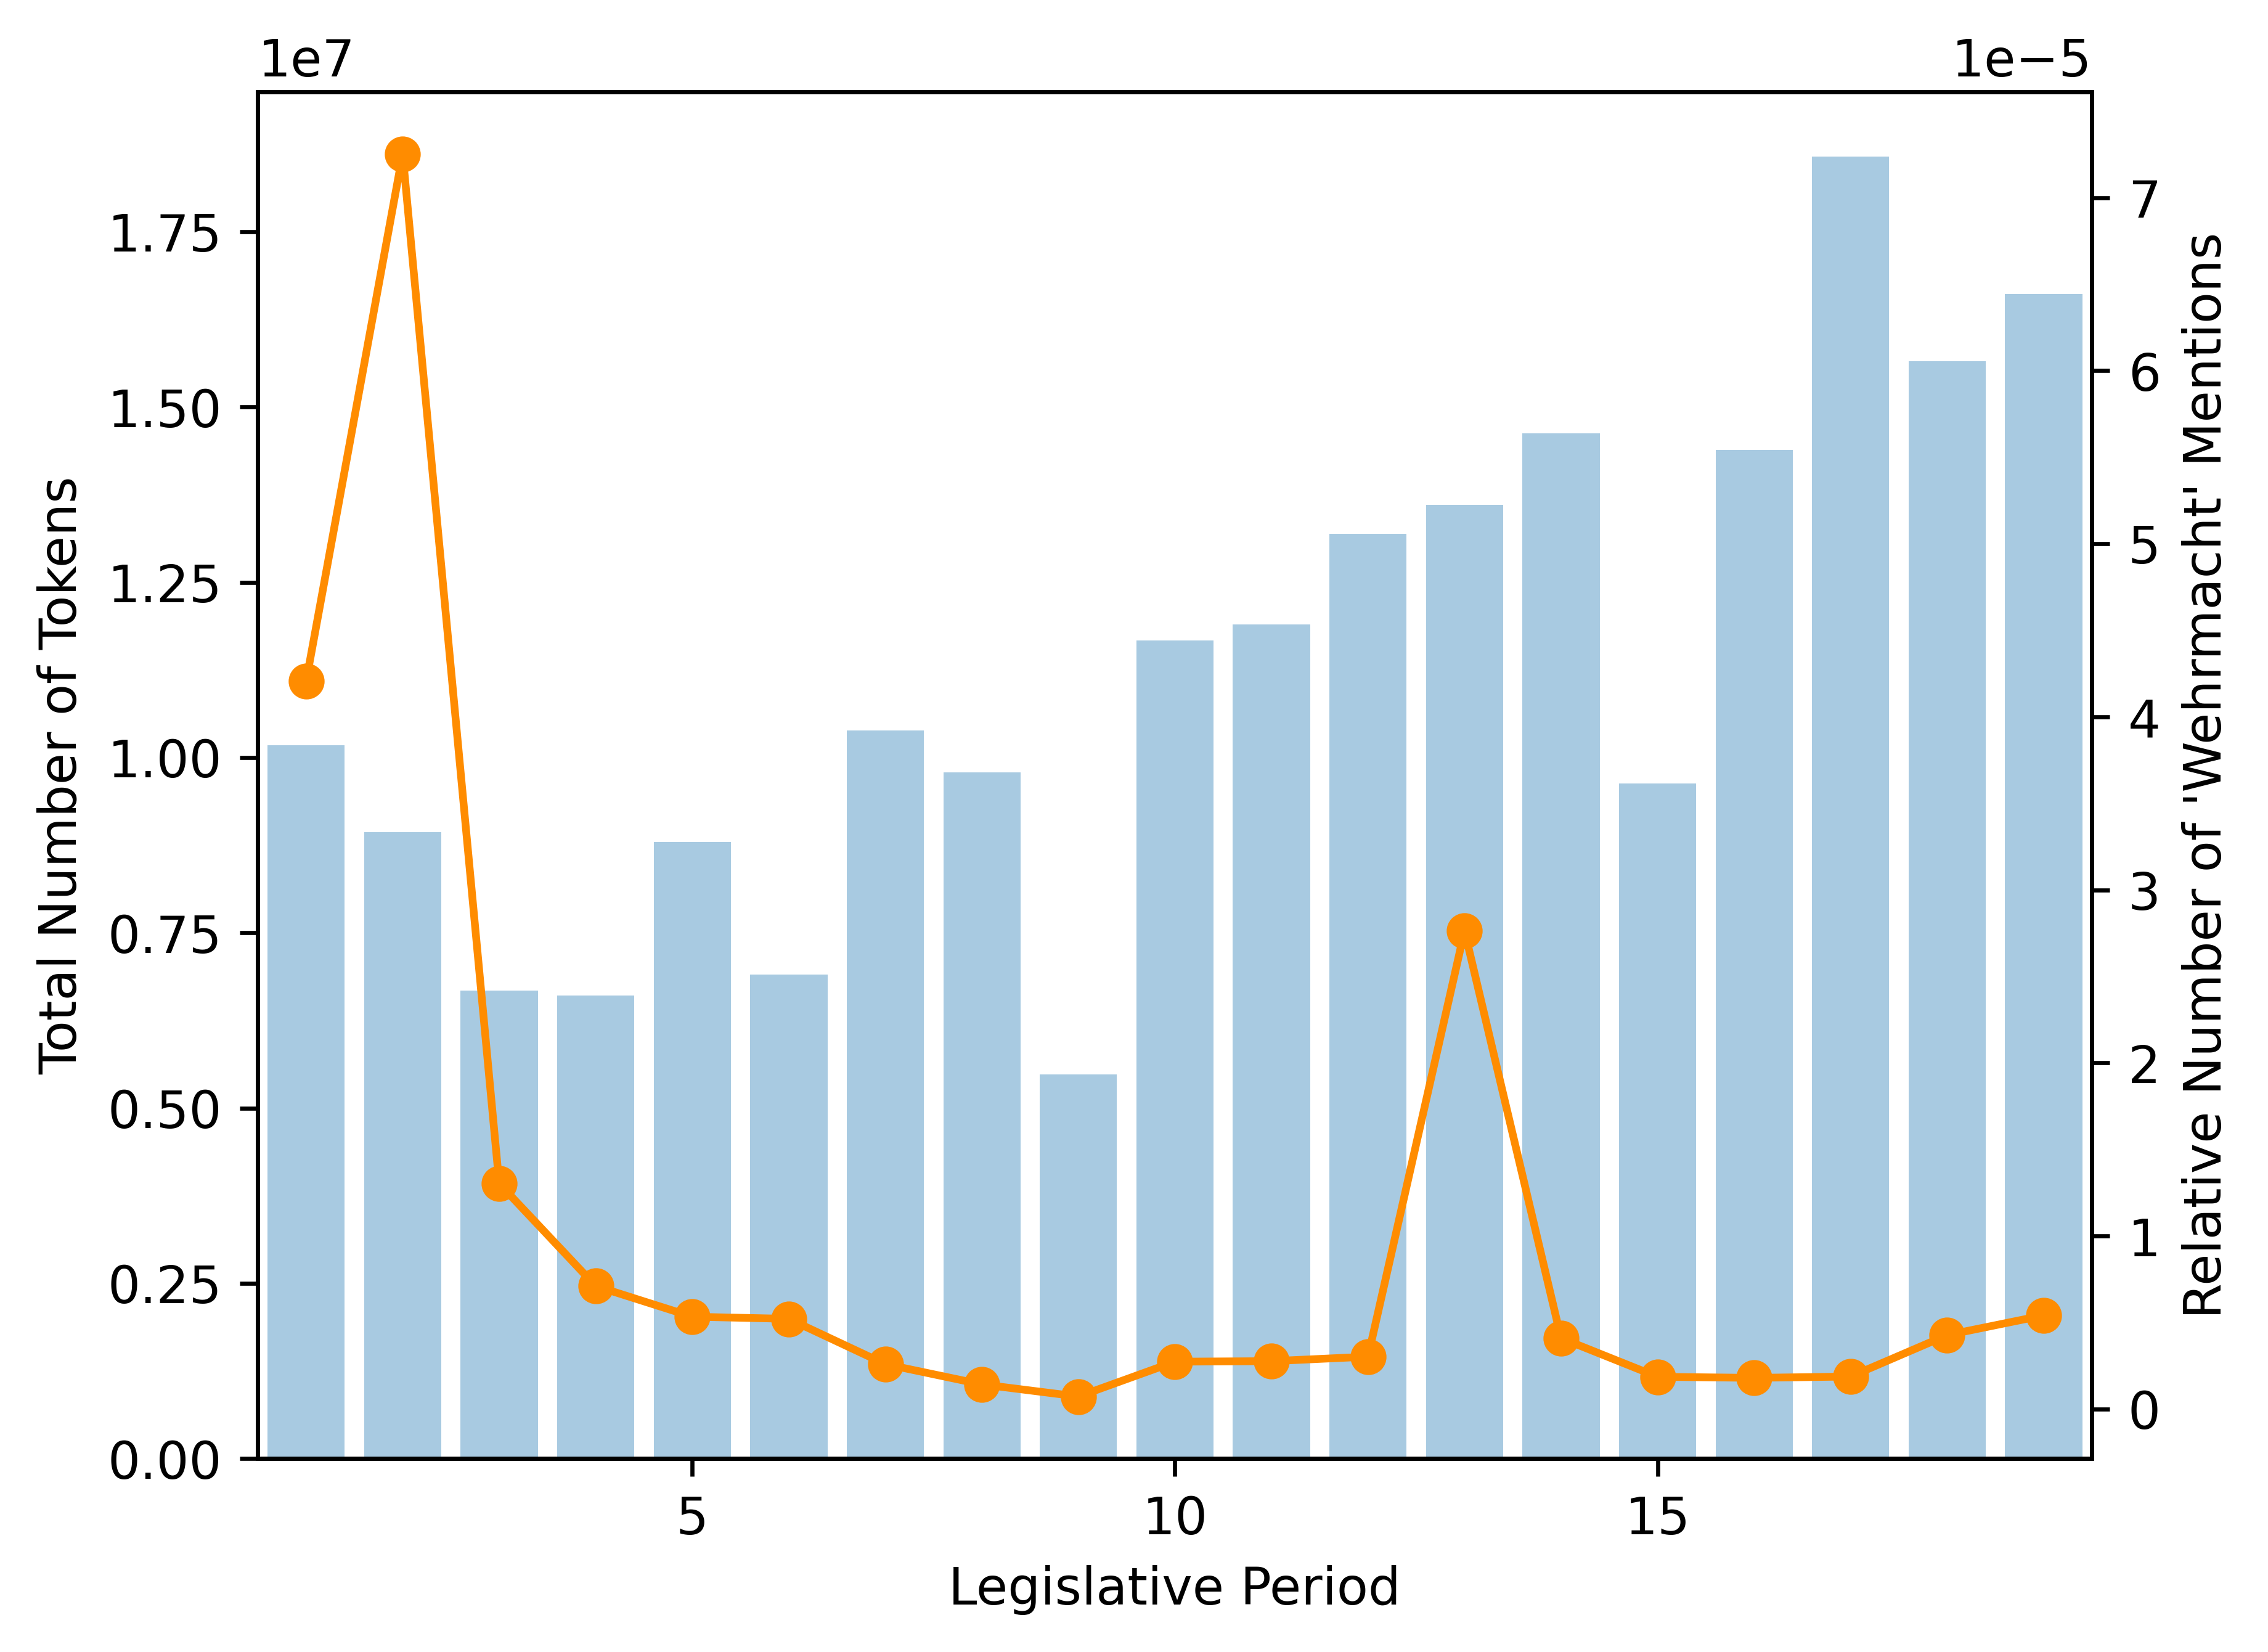

In [2]:
from IPython.display import Image, display
metadata={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "Figure 1. Visualization of the total number of tokens as bars and the number of “Wehrmacht” mentions as dots by legislative period of the Bundestag.",
          ]
        }
    }
}
display(Image("./media/figure1.png", width=1000), metadata=metadata)

One can also compare frequencies by party. Table 1 presents both the absolute and relative frequencies of the term “Wehrmacht” for each legislative period and relevant party. During the first peak, the relative frequency of “Wehrmacht” was highest in speeches by members of the liberal FDP, followed by that of the smaller parties represented at that time. In comparison, the center-left SPD showed the lowest frequency. For the second peak, the relative frequency of the term was highest for the center-left Grüne and the left-wing PDS. Both the FDP and SPD exhibited only half the average relative frequency. The center-right CDU/CSU's values were about average for both peaks.

|                    | Number of ‚Wehrmacht‘ tokens |         |     |                 |           |     |        |       | Number of ‚Wehrmacht‘ tokens per million tokens |         |       |                 |           |       |        |       |
|--------------------|------------------------------|---------|-----|-----------------|-----------|-----|--------|-------|-------------------------------------------------|---------|-------|-----------------|-----------|-------|--------|-------|
| Legislative period | AfD                          | CDU/CSU | FDP | Bündnis90/GRÜNE | PDS/LINKE | SPD | Others | Total | AfD                                             | CDU/CSU | FDP   | Bündnis90/Grüne | PDS/LINKE | SPD   | Others | Total |
| 1                  | -                            | 170     | 48  | -               | -         | 62  | 148    | 428   | -                                               | 43.65   | 29.25 | -               | -         | 19.56 | 51.51  | 36.97 |
| 2                  | -                            | 237     | 194 | -               | -         | 94  | 123    | 648   | -                                               | 58.33   | 121.9 | -               | -         | 30.21 | 91.72  | 64.11 |
| 3                  | -                            | 45      | 5   | -               | -         | 26  | 11     | 87    | -                                               | 14.35   | 4.67  | -               | -         | 10.23 | 13.8   | 11.53 |
| 4                  | -                            | 24      | 15  | -               | -         | 6   | 2      | 47    | -                                               | 7.15    | 9.65  | -               | -         | 2.36  | 5.6    | 6.01  |
| 5                  | -                            | 22      | 14  | -               | -         | 11  | 0      | 47    | -                                               | 5.12    | 6.03  | -               | -         | 3.17  | 0.0    | 4.5   |
| 6                  | -                            | 17      | 12  | -               | -         | 7   | 0      | 83    | -                                               | 5.24    | 7.24  | -               | -         | 2.07  | 0.0    | 4.31  |
| 7                  | -                            | 16      | 7   | -               | -         | 4   | 0      | 27    | -                                               | 3.53    | 2.49  | -               | -         | 0.79  | 0.0    | 2.17  |
| 8                  | -                            | 3       | 6   | -               | -         | 5   | 0      | 14    | -                                               | 0.69    | 2.29  | -               | -         | 1.07  | 0.0    | 1.2   |
| 9                  | -                            | 2       | 0   | -               | -         | 2   | 0      | 4     | -                                               | 0.84    | 0.0   | -               | -         | 0.74  | 0.0    | 0.61  |
| 10                 | -                            | 10      | 0   | 7               | -         | 15  | 0      | 32    | -                                               | 1.78    | 0.0   | 4.69            | -         | 3.18  | 0.0    | 2.24  |
| 11                 | -                            | 11      | 0   | 17              | 0         | 5   | 0      | 33    | -                                               | 2.07    | 0.0   | 9.48            | 0.0       | 1.08  | 0.0    | 2.31  |
| 12                 | -                            | 5       | 0   | 1               | 23        | 11  | 0      | 40    | -                                               | 0.83    | 0.0   | 1.32            | 20.32     | 2.31  | 0.0    | 2.58  |
| 13                 | -                            | 110     | 31  | 94              | 79        | 62  | 0      | 376   | -                                               | 17.46   | 10.78 | 40.45           | 67.24     | 12.55 | 0.0    | 21.33 |
| 14                 | -                            | 13      | 1   | 20              | 16        | 10  | 0      | 60    | -                                               | 2.49    | 0.45  | 6.7             | 8.46      | 1.46  | 0.0    | 3.11  |
| 15                 | -                            | 1       | 1   | 3               | 7         | 6   | 0      | 18    | -                                               | 0.24    | 0.65  | 1.46            | 32.96     | 1.25  | 0.0    | 1.41  |
| 16                 | -                            | 5       | 0   | 9               | 12        | 0   | 0      | 26    | -                                               | 0.91    | 0.0   | 3.54            | 5.01      | 0.0   | 0.0    | 1.39  |
| 17                 | -                            | 16      | 0   | 1               | 11        | 7   | 0      | 35    | -                                               | 1.85    | 0.0   | 0.31            | 3.42      | 1.35  | 0.0    | 1.43  |
| 18                 | -                            | 17      | 0   | 14              | 30        | 5   | 1      | 67    | -                                               | 2.05    | 0.0   | 4.16            | 10.11     | 0.81  | 19.29  | 3.22  |
| 19                 | 12                           | 18      | 6   | 6               | 28        | 16  | 4      | 90    | 5.27                                            | 2.46    | 2.12  | 2.11            | 11.0      | 3.46  | 19.28  | 3.98  |


Considering these frequencies, the corpus is divided using a sliding window of ten years, which shifts by five years. This technique yields 13 overlapping time frames covering the years 1949 to 2018. The ten-year window ensures that the count of 'Wehrmacht' tokens is reasonably high in each slice, while the overlap allows for a finer resolution of the analyzed period.

### Word embedding neighbors

For each time frame, the corresponding word embedding indicates the contexts in which the term “Wehrmacht” appears within the Bundestag’s proceedings. Table 2 shows the ten nearest neighbors of “Wehrmacht” in each embedding’s vector space. In the first two time frame, where “Wehrmacht” exhibits the highest frequency, its closest similarities are to military terms. These include words for military branches (“Heer”, “Marine”), military personnel, and its organization (“Soldat”, “Offizier”, “Berufssoldat”). Additionally, the Reichswehr, as the German armed forces were titled until 1935, and the Bundeswehr are present. This suggests that the frequent mentions of the Wehrmacht in the 1950s Bundestag primarily revolved around technical issues of military organization, pertinent to the establishment of the Bundeswehr, and matters regarding military personnel, relevant to both the new armed forces and the treatment of veterans.

| 1949–1958        |                      |            | 1954–1963          |                      |            | 1959–1968     |               |            | 1964–1973            |                      |            | 1969–1978         |             |            | 1974–1983  |                |            | 1979–1988         |              |            | 1984–1993  |             |            | 1989–1998          |                     |            | 1994–2003           |                     |            | 1999–2008           |                    |            | 2004–2013           |                    |            | 2009–2018           |                     |            |
|------------------|----------------------|------------|--------------------|----------------------|------------|---------------|---------------|------------|----------------------|----------------------|------------|-------------------|-------------|------------|------------|----------------|------------|-------------------|--------------|------------|------------|-------------|------------|--------------------|---------------------|------------|---------------------|---------------------|------------|---------------------|--------------------|------------|---------------------|--------------------|------------|---------------------|---------------------|------------|
| term             | translation          | similarity | term               | translation          | similarity | term          | translation   | similarity | term                 | translation          | similarity | term              | translation | similarity | term       | translation    | similarity | term              | translation  | similarity | term       | translation | similarity | term               | translation         | similarity | term                | translation         | similarity | term                | translation        | similarity | term                | translation        | similarity | term                | translation         | similarity |
| reichswehr       | Reichswehr           | 0.75       | soldat             | soldier              | 0.73       | reichswehr    | Reichswehr    | 0.76       | waffen-ss            | Waffen-SS            | 0.77       | reichswehr        | Reichswehr  | 0.82       | reichswehr | Reichswehr     | 0.82       | reichswehr        | Reichswehr   | 0.83       | reichswehr | Reichswehr  | 0.78       | soldatentum        | soldiery            | 0.78       | dietl               | Dietl               | 0.77       | waffen-ss           | Waffen-SS          | 0.82       | waffen-ss           | Waffen-SS          | 0.78       | konzentrationslager | concentration camp  | 0.79       |
| soldat           | soldier              | 0.75       | bundeswehr         | Bundeswehr           | 0.73       | soldatentum   | soldiery      | 0.75       | reichswehr           | Reichswehr           | 0.75       | waffen-ss         | Waffen-SS   | 0.76       | armee      | army           | 0.73       | condor            | condor       | 0.73       | waffen-ss  | Waffen-SS   | 0.76       | waffen-ss          | Waffen-SS           | 0.77       | hitler              | Hitler              | 0.76       | konzentrationslager | concentration camp | 0.76       | nationalsozialist   | Nazi               | 0.77       | nationalsozialist   | Nazi                | 0.79       |
| bundeswehr       | Bundeswehr           | 0.73       | armee              | army                 | 0.73       | massenmördern | mass murderer | 0.74       | massenmördern        | mass murderer        | 0.73       | kaiserlich        | imperial    | 0.71       | 1933       | 1933           | 0.73       | waffen-ss         | Waffen-SS    | 0.73       | 1941       | 1941        | 0.74       | hitler             | Hitler              | 0.76       | waffen-ss           | Waffen-SS           | 0.74       | nationalsozialist   | Nazi               | 0.75       | 1945                | 1945               | 0.77       | waffen-ss           | Waffen-SS           | 0.78       |
| offizier         | officer              | 0.73       | reichswehr         | Reichswehr           | 0.72       | waffen-ss     | Waffen-SS     | 0.74       | nva                  | NVA                  | 0.7        | soldatentum       | soldiery    | 0.7        | waffen-ss  | Waffen-SS      | 0.71       | nazi              | Nazi         | 0.69       | hitler     | Hitler      | 0.74       | dietl              | Dietl               | 0.75       | nationalsozialismus | Nazi                | 0.73       | hitler              | Hitler             | 0.75       | konzentrationslager | concentration camp | 0.75       | 1941                | 1941                | 0.77       |
| heer             | army                 | 0.73       | heer               | Army                 | 0.7        | legion        | legion        | 0.68       | soldatentum          | soldiery             | 0.69       | armee             | army        | 0.7        | kaiserlich | imperial       | 0.71       | 1918              | 1918         | 0.68       | condor     | condor      | 0.73       | nazi               | Nazi                | 0.74       | nationalsozialist   | Nazi                | 0.72       | widerstandskämpfer  | resistance fighter | 0.75       | kriegsgefangene     | POW                | 0.75       | 1945                | 1945                | 0.77       |
| armee            | army                 | 0.73       | berufssoldat       | professional soldier | 0.68       | zivilist      | civilian      | 0.68       | berufssoldat         | professional soldier | 0.68       | 1945              | 1945        | 0.69       | patriot    | patriot        | 0.71       | oberkommando      | high command | 0.68       | nazi       | Nazi        | 0.71       | vernichtungskrieg  | war of annihilation | 0.73       | nazi                | Nazi                | 0.72       | 1941                | 1941               | 0.75       | kz                  | concentration camp | 0.75       | vernichtungskrieg   | war of annihilation | 0.76       |
| marine           | navy                 | 0.72       | offizier           | officer              | 0.68       | nva           | NVA           | 0.68       | kriegsgefangenschaft | war captivity        | 0.67       | preußisch         | Prussian    | 0.69       | nazi       | Nazi           | 0.7        | 1941              | 1941         | 0.67       | legion     | legion      | 0.7        | widerstandskämpfer | resistance fighter  | 0.72       | soldatentum         | soldiery            | 0.72       | reichswehr          | Reichswehr         | 0.73       | 1933                | 1933               | 0.74       | militarismus        | militarism          | 0.76       |
| berufssoldat     | professional soldier | 0.72       | marine             | navy                 | 0.67       | armee         | army          | 0.67       | bundeswehrsoldat     | Bundeswehr soldier   | 0.67       | nationalsozialist | Nazi        | 0.69       | nazizeit   | Nazi period    | 0.7        | kriegsverbrecher  | war criminal | 0.67       | befehl     | order       | 0.7        | faschismus         | fascism             | 0.72       | vernichtungskrieg   | war of annihilation | 0.71       | 1933                | 1933               | 0.72       | hitler              | Hitler             | 0.73       | hitler              | Hilter              | 0.76       |
| bundeswehrsoldat | Bundeswehr sodlier   | 0.69       | offizierskorps     | officer corps        | 0.65       | legionär      | legionary     | 0.67       | 1945                 | 1945                 | 0.67       | 1920              | 1920        | 0.68       | 1918       | 1918           | 0.7        | nationalsozialist | Nazi         | 0.67       | deserteur  | deserter    | 0.69       | militarismus       | militarism          | 0.72       | kriegsgeneration    | war generation      | 0.71       | nazi                | Nazi               | 0.72       | kriegsgefangener    | POW                | 0.73       | auschwitz           | Auschwitz           | 0.75       |
| offizierskorps   | officer corps        | 0.69       | unteroffizierkorps | NCO corps            | 0.64       | hitler        | Hitler        | 0.66       | kriegsgefangener     | POW                  | 0.66       | gefangennahme     | capture     | 0.68       | kriegsende | end of the war | 0.7        | legion            | legion       | 0.67       | 1944       | 1944        | 0.69       | nationalsozialist  | Nazi                | 0.72       | militarismus        | militarism          | 0.7        | faschismus          | fascism            | 0.72       | 1941                | 1941               | 0.73       | nazizeit            | Nazi period         | 0.74       |


The Wehrmacht's nearest neighbors for the time frame running from the late 1950s to the early 1970s display similarities to the preceding ones. Once more, there are multiple terms referencing military personnel (“Berufssoldat”, “Bundeswehrsoldat”). In the context of the 1960s and 1970s, these likely relate to the newly established Bundeswehr, while the new East German forces are also mentioned (“NVA”). A clear distinction from the earlier time frames lies in the noticeable presence of terms associated with prisoners of war (“Kriegsgefangenschaft”, “Kriegsgefangener”). Given that the last German POWs were released from Soviet captivity to West Germany in the mid-1950s, it is surprising that the issue only appears in the Wehrmacht's context by the 1960s when much of the legislative problems pertaining to veterans and POWs had already been addressed. A further break from the earlier time frames is the appearance of the terms “Hitler” and “Massenmörder,” indicating early instances of political judgment in debates on the Wehrmacht at the time.

By the 1970s and 1980s, the neighboring terms suggest that parliamentary discussions of the Wehrmacht increasingly shift from practical to historical contexts. The terms “Legion Condor,” “Waffen-SS,” and “Reichswehr” show a high degree of similarity to “Wehrmacht.” Other closely related terms include “Nazi,” references to Prussia and imperial Germany, and several historical dates. By the 1990s, the trend of contextualizing the Wehrmacht within Nazi discourse in parliamentary speeches becomes dominant, coinciding with the second frequency peak. “Hitler” and several other terms related to Nazism and fascism appear among the top ten. In contrast to earlier periods, discussions now explicitly highlight the illegitimacy of German military conduct in general, as indicated by terms like “Vernichtungskrieg” and “Widerstandskämpfer.” Additionally, the presence of Eduard Dietl’s name (“Dietl”) underscores the legislature's concern with continuities between the Wehrmacht and the Bundeswehr. The issue of renaming Bavarian barracks that had been named after Dietl — a general widely believed to have been a staunch supporter of Nazism and a war criminal — was raised multiple times in the legislature. The end of the Cold War may have contributed to shifting law makers attention to these symbolic questions, as matters of defense policy and procurement became less urgent. In the last recent time frames, the trends of the 1990s persist, but the Wehrmacht is placed even more directly in the context of genocide, as reflected by terms such as “Konzentrationslager,” “KZ,” and “Auschwitz.”

In summary, the contexts for debating the Wehrmacht in the Bundestag shifted, as evidenced by the term’s nearest neighbors. In the immediate post-war period, references to the Wehrmacht centered around military and organizational terms. However, by the 1970s, the Wehrmacht was increasingly situated within historical contexts, ultimately emphasizing Nazi crimes by the 1990s.

### Semantic shift

To assess the semantic shift of the term “Wehrmacht” in the Bundestag’s proceedings relative to target terms, aligned word embeddings are utilized. These embeddings enable an assessment of how the nearest neighbors of “Wehrmacht” compare to the designated target terms in each specific time frame.

As a means to test the quality of the results, the shift is also measured for the terms “Bundeswehr” and “Waffen-SS,” which are assumed to exhibit more semantic stability over time. To validate this assumption, the cosine similarity of all three terms to themselves is calculated for all time frames. [Figure 2](#figure-2-*) illustrates the resulting values. As anticipated, all three terms decrease in self-similarity across the time frames. Notably, “Wehrmacht” displays the strongest shift. In the final time frame, its cosine similarity to its vector in the first time frame stands at only 0.71, as compared to 0.79 for “Waffen-SS” and 0.80 for “Bundeswehr.” This suggests that the two selected terms could indeed serve as more stable references for comparison.

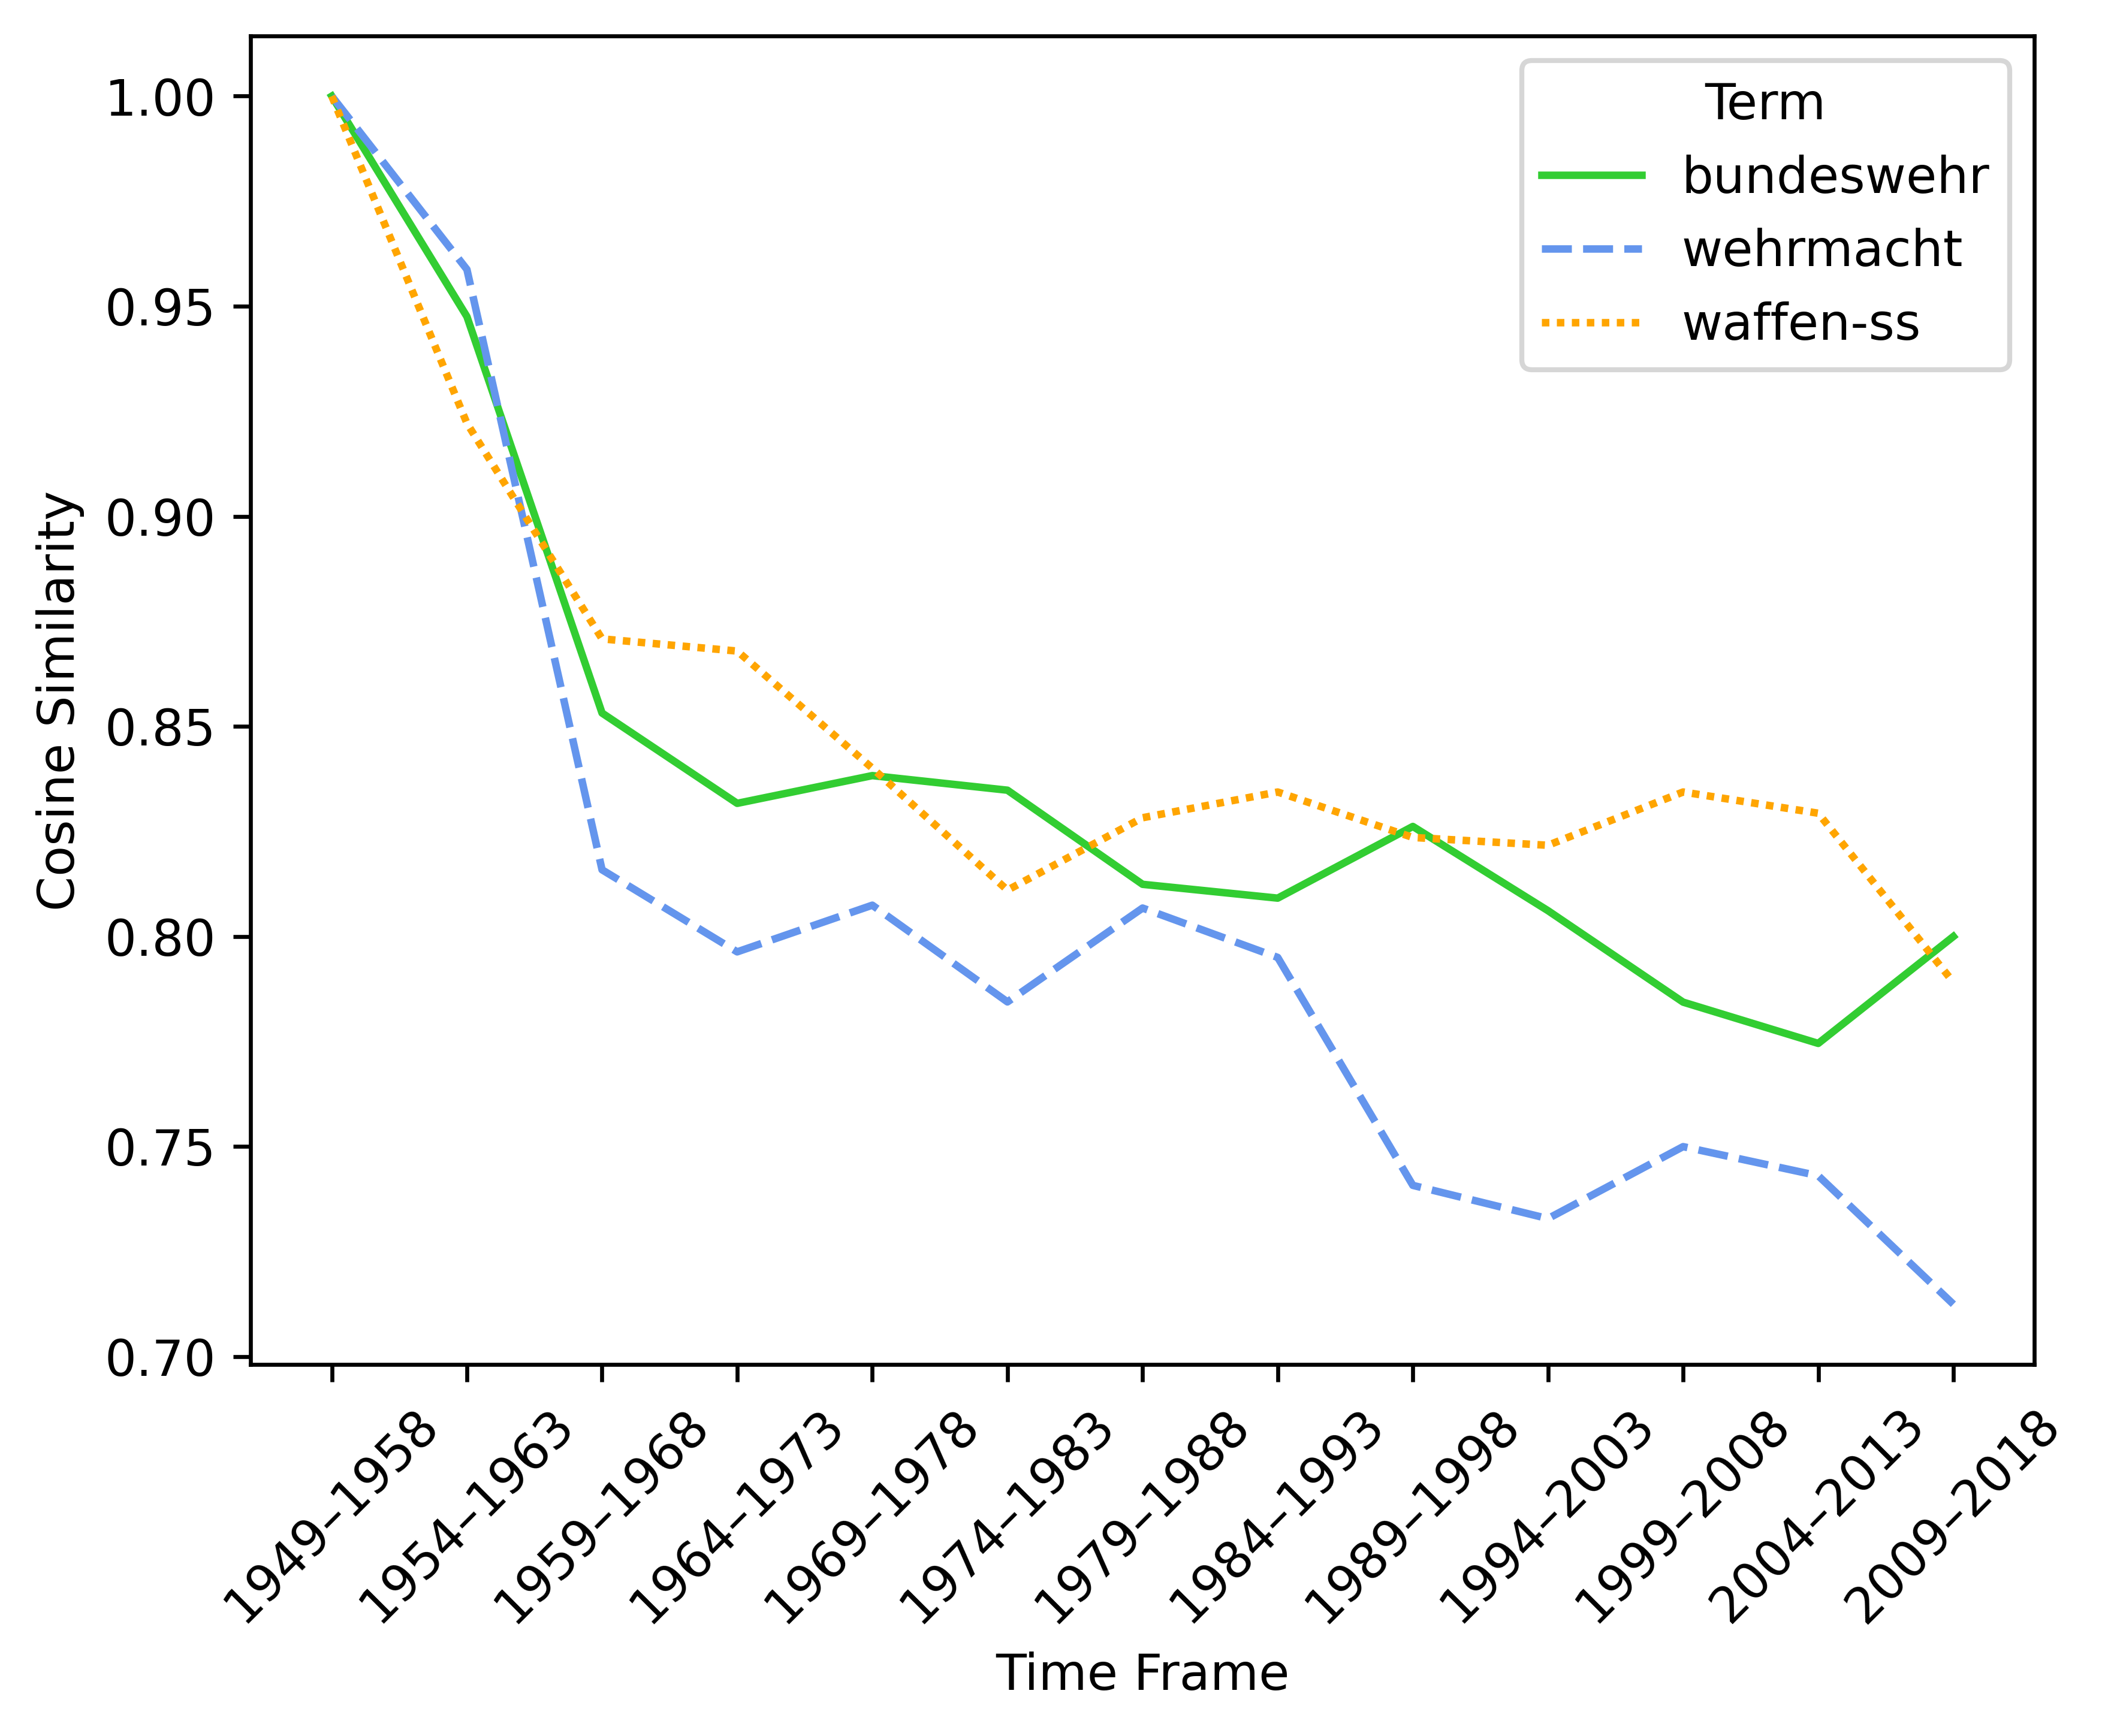

In [1]:
from IPython.display import Image, display
metadata={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "Figure 2. Cosine similarity of three terms to themselves for each time frame.",
          ]
        }
    }
}
display(Image("./media/figure2.png", width=1000), metadata=metadata)

The first target for evaluating the semantic shift of “Wehrmacht” are terms related to war crime. To encompass the concept of war crimes broadly, the vector used for comparison is composed from the individual vectors for “Kriegsverbrechen” (war crime) and “Kriegsverbrecher” (war criminal). Other German forms of these two word have been standardized through the previous lemmatization and do not appear in the embeddings. [Figure 3](#figure-3-*) shows the average cosine similarity of the one hundred nearest neighbors of “Wehrmacht,” “Bundeswehr,” and “Waffen-SS” to this vector across all time frames. 

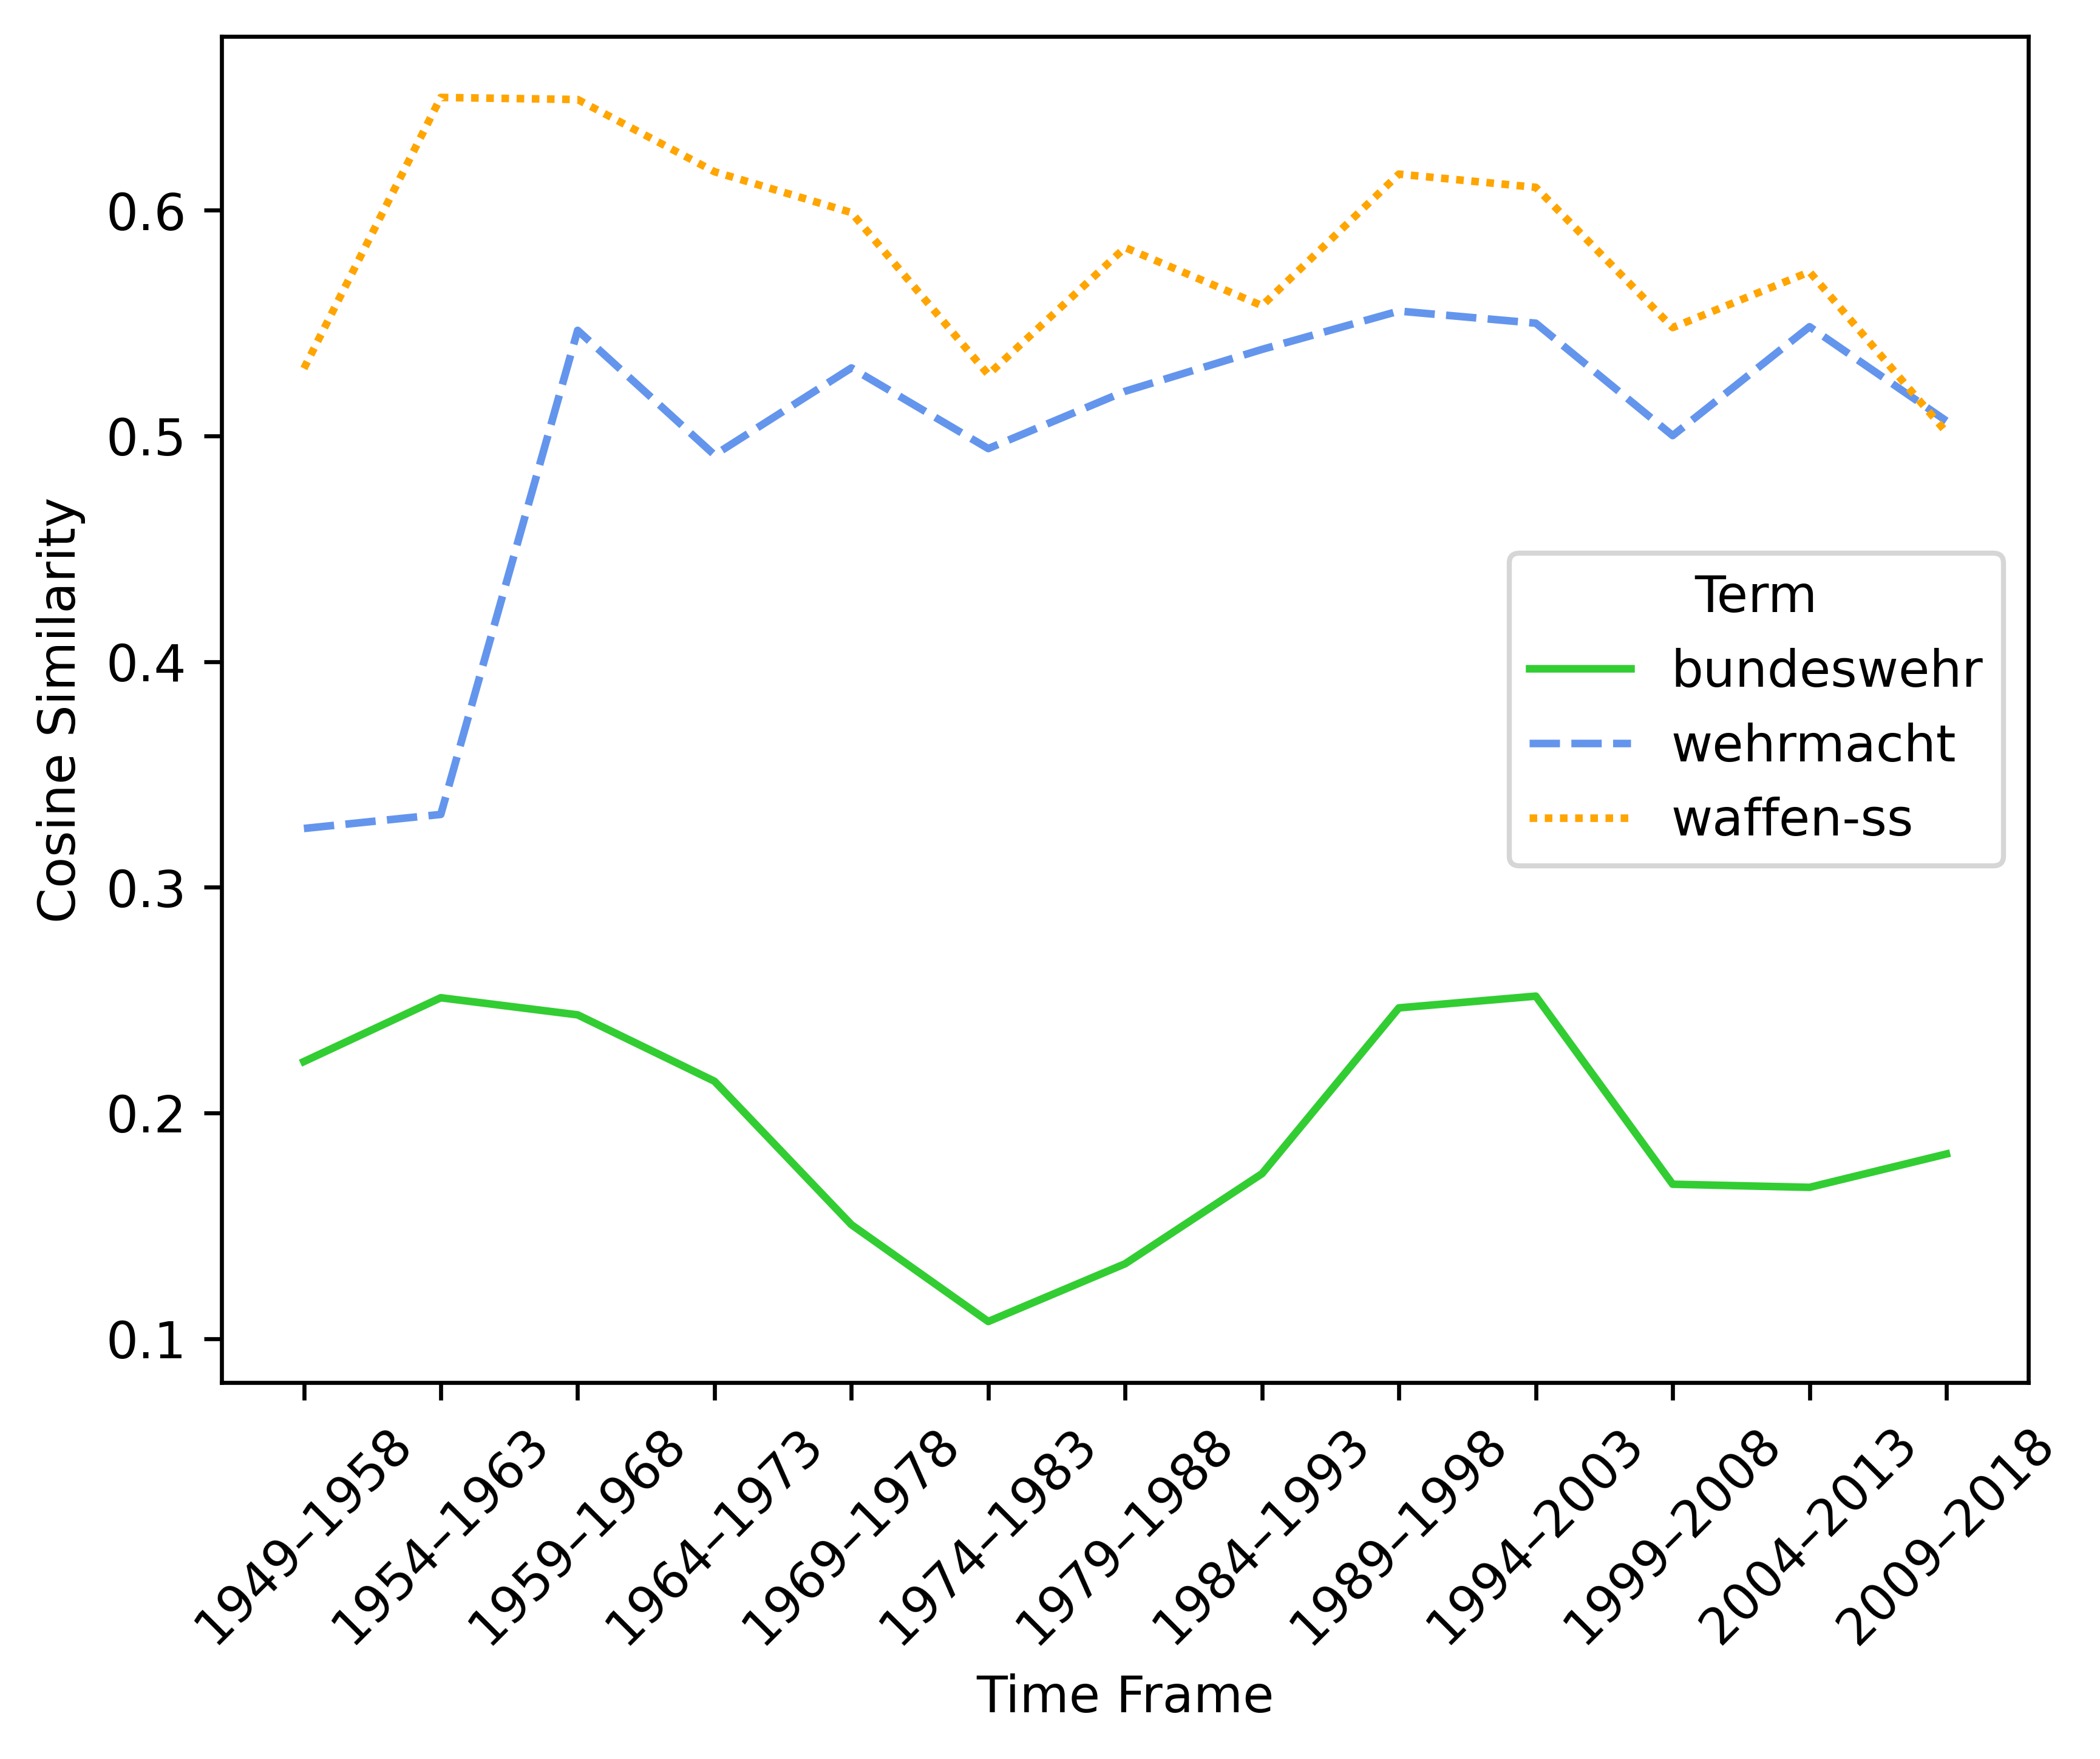

In [3]:
from IPython.display import Image, display
metadata={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "Figure 3. Average cosine similarity of the one hundred nearest neighbors of three terms to the “war crime” concept vector.",
          ]
        }
    }
}
display(Image("./media/figure3.png", width=1000), metadata=metadata)

As expected, “Bundeswehr” generally shows the lowest association with war crimes, with relatively higher values in the 1950s, 1960s, and 1990s. This could possibly be influenced by the debates on screening veterans for military service after German rearmament and the prominence of the Yugoslav wars, along with the Bundeswehr’s potential involvement, in the political discussions of the 1990s. In contrast, “Waffen-SS” consistently exhibits the highest similarity values and maintains a relatively stable association with war crimes throughout all time frames. The sematic shift of “Wehrmacht” is most discernible: the average similarity initially resembles that of the Bundeswehr but approaches that of “Waffen-SS” in later periods. Generally, the values show the same fluctuations as “Waffen-SS,” albeit at a slightly lower level. This suggests that the association of the Wehrmacht with war crimes in the Bundestag was comparably low in the first legislative terms but grew markedly in the 1960s, and declined only moderately and temporarily thereafter. Even by the 1970s, the association of the Wehrmacht with war crimes appears nearly as strong as that of the Waffen-SS.

The second concept for comparison is Nazism. For this the vectors of the German word’s common variations “Nazi,” “Nationalsozialismus,” “Nationalsozialist,” as well as “Hitler” are averaged into a target vector. [Figure 4](#figure-4-*) visualizes the average cosine similarities of the one hundred nearest neighbors to this vector. Once again, “Bundeswehr” consistently shows the lowest similarity, decreasing over time. While “Wehrmacht” resembles “Bundeswehr” more than “Waffen-SS” initially, it exhibits the strongest increases in similarity, surpassing “Waffen-SS” in the 1970s and 1990s. This indicates that the association between the Wehrmacht and Nazism, though not particularly strong in the early Bundestag, intensified after 1960 and remained at a high level, comparable to that of the Waffen-SS, peaking in the 1990s.

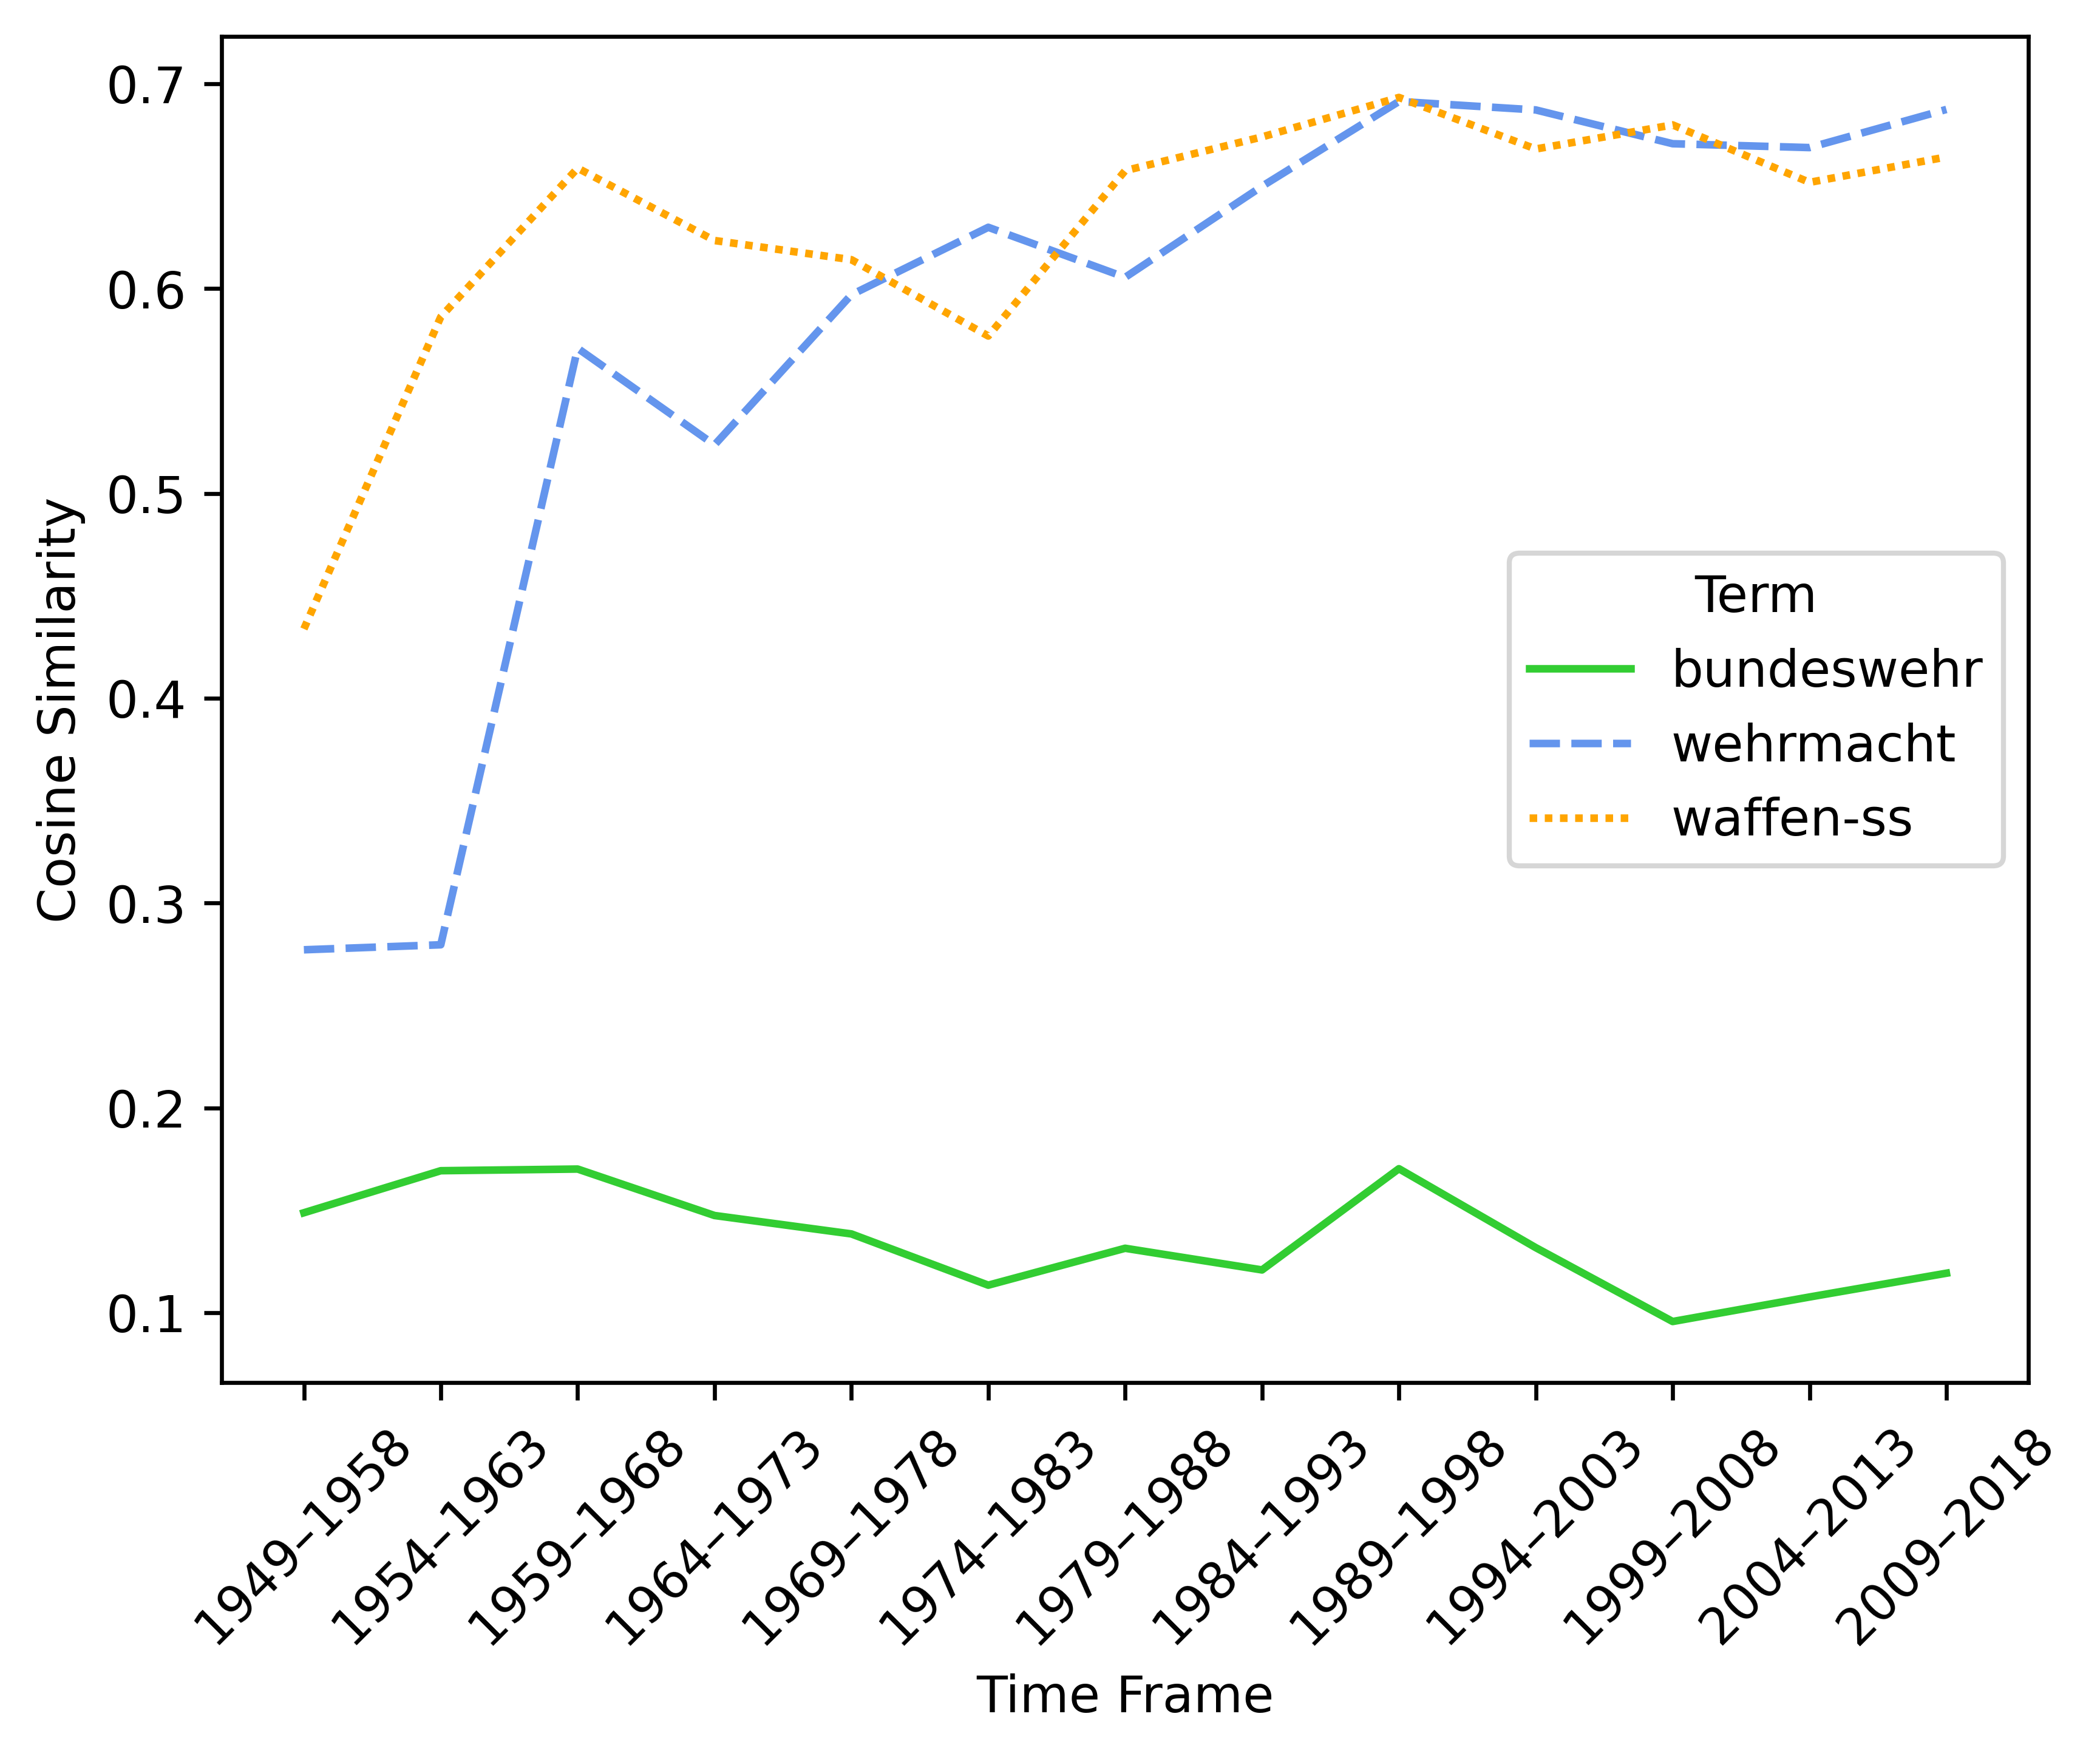

In [4]:
from IPython.display import Image, display
metadata={
    "jdh":{
        "module": "object",
        "object": {
          "type": "image",
          "source": [
            "Figure 4. Average cosine similarity of the one hundred nearest neighbors of three terms to the “Nazism” concept vector.",
          ]
        }
    }
}
display(Image("./media/figure4.png", width=1000), metadata=metadata)

To summarize, the term “Wehrmacht” became increasingly associated with the concepts of war crime and Nazism in the Bundestag’s proceedings over time. When compared to the Bundeswehr and Waffen-SS, the shift in the Wehrmacht’s similarity to these concepts becomes evident. Initially, in the immediate post-war years, the Wehrmacht shows lower similarity values akin to those of the Bundeswehr. However, these values progressively increase and, by the 1970s, align with those of the Waffen-SS.

## Discussion

According to the analysis, references to the Wehrmacht in post-war German parliamentary debates fluctuated noticeably in terms of frequencies and semantic relations. This reflected the prevailing attitudes among both the public and politicians towards the legacy of Nazism in general, and specifically, the Wehrmacht. With the passage of time and the fading of wartime experiences, the term “Wehrmacht” became increasingly open to more challenging interpretations and contextualization.

### Early post-war years

To contextualize the political debates surrounding the Wehrmacht in early post-War Germany, it is important to reference the public discourse of the time. Any absence of references to Wehrmacht crimes in political speech cannot be explained by lack of knowledge. Under occupation, condemning information on military misconduct quickly became readily available and widespread through public channels. Particularly in the western occupation zones, Allied administrators were invested in the denazification process and eager to employ the press placed under their jurisdiction to publish their findings. As early as 1945, newspapers extensively covered not just the crimes of the Nazi government, but also the compliance of the military. This coverage included trials against war criminals, revelations of incriminating orders, and reports detailing atrocities committed by German soldiers against POWs and concentration camp inmates (<cite id="j1gxk"><a href="#zotero%7C14151639%2FBNAI42KK">(Echternkamp)</a></cite>). This is relevant, as it underscores the public’s access to knowledge regarding the Wehrmacht’s responsibility for war crimes and its ties to the political leadership. However, as newspapers debated the often-posed question of collective culpability, writers emphazised a limited responsibility among lower-ranked or younger soldiers (<cite id="g1l2m"><a href="#zotero%7C14151639%2FBNAI42KK">(Echternkamp)</a></cite>).

During the years of occupation and early republican government in West Germany, the Wehrmacht continued to be a subject of public interest. As <cite id="ffx3s"><a href="#zotero%7C14151639%2FG39VCVAL">(Danyel)</a></cite> points out, the post-war era was not characterized by collective silence regarding recent historical experiences. Instead, a plethora of publications, ranging from fiction to autobiographies of general officers, expressed a desire to affirm individuals’ actions during the war as heroic or meaningful, despite being overshadowed by a criminal leadership. Simultaneously, West German politics adopted a pragmatic approach when handling former Nazis within the public sector. In the Bundestag, this pragmatism was evident in two key political domains: social welfare and rearmament. Whereas Allied administrations had exhibited various degrees of reluctance in awarding benefits to Wehrmacht veterans, the formation of a West German state necessitated a harmonization of claims. The Bundestag initiated the establishment of an intricate system of support for war-disabled veterans and implemented special provisions for former professional soldiers (<cite id="8snua"><a href="#zotero%7C14151639%2FLE95NZED">(Wulfhorst)</a></cite>).

Additionally, there was a pressing need for legislative guidance concerning the details of rearmament, as West Germany was poised to become a member of the NATO alliance. The newly created Bundeswehr, initially planned under the more popular working title "Neue Wehrmacht", was envisioned as democratically accountable and strictly controlled (<cite id="bf7ni"><a href="#zotero%7C14151639%2FFAYT4IWC">(Schlaffer)</a></cite>). However, there were numerous continuities in both personnel and military traditions that prompted political resistance to rearmament and required discussion (<cite id="cn4sr"><a href="#zotero%7C14151639%2FS8994327">(Bald)</a></cite>). Parts of the public opposed the plans due to the evident failings of the Wehrmacht’s leadership. At the same time, many veterans still felt unfairly treated and were apprehensive about the prospect of serving alongside their former enemies within the NATO framework. To ease this uneasiness, the government in careful preparations for rearmament even convinced Allied authorities to relativize their condemnations of the Wehrmacht. In 1951, General Eisenhower, contrasting his previous statements, affirmed that the Wehrmacht’s soldiers had not lost their military honor and should be differentiated from their criminal Nazi leadership (<cite id="gowib"><a href="#zotero%7C14151639%2FRYEJUH4P">(Schubert)</a></cite>). 
This context fits well the analytical findings, that the early Bundestag was mainly concerned with organizational and personnel matters when referencing the Wehrmacht. Bringing up associations with war crimes or Nazi ideology, though publicly known, was not common at the time.

### Shifts between 1961 and 1990

The analysis demonstrates a shift of the Wehrmacht’s role from early post-war debates. While the nearest semantic neighbors to the term stayed comparable at first, a transition occurred towards closer associations with war crimes and Nazism, at least beginning in the 1960s. Concurrently, the low frequencies indicate that the Wehrmacht was no longer a frequent subject of parliamentary debate. These developments can be attributed, in part, to the diminishing necessity for legislation concerning military affairs from the 1960s onward. However, the public continued to debate the past, often revealing generational divides.

One point of public interest was the ongoing judicial processing of war crimes. Following the initial trials against war criminals under Allied direction, the authority of German prosecutors to bring charges against former soldiers was incrementally restored. Despite the statutes of limitations expiring on all charges except murder under German law by 1960, the Länder (federal states) began coordinating their efforts in prosecution from 1965 onward. Especially instances of mistreatment of Soviet POWs by Wehrmacht soldiers were investigated and charged in the 1950s and 1960s, although few cases went to trial or resulted in convictions (<cite id="39buk"><a href="#zotero%7C14151639%2FDP6PPCSR">(Birn)</a></cite>). While these trials did not garner the same public attention as, for example, the contemporaneous Auschwitz trials in Frankfurt against former SS members, they served to reinforce the acknowledgment of the Wehrmacht’s involvement in criminal activities.
By the late 1960s, a protest movement had emerged primarily among student groups, questioning the actions of institutions and prominent figures during the Nazi regime. As the public debate expanded to include voices of individuals who had not been directly involved in Germany’s wartime actions due to their age, the association between the Wehrmacht and Nazism strengthened further. By the 1980s, these attitudes also found expression in the Bundestag.

### After reunification

With the German reunification in 1990, the conditions for public discourse on the past underwent significant changes. The integration of former East Germany into the West German political framework compelled society to confront candidly the collapsed Soviet-backed dictatorship. Since 1990, the inclusion of members from the eastern Länder made the Bundestag into a forum for such discussions. Simultaneously, reunification appeared to ignite a new public interest in recent history, marked by several prominent controversies in the 1990s. These debates centered on issues related to commemorating a complex national history and understanding the circumstances that led to its totalitarian regimes (<cite id="22g5e"><a href="#zotero%7C14151639%2FZQGPZLBB">(Reil)</a></cite>).

One enduring controversy revolved around the so-called “Wehrmachtsausstellung” (Wehrmacht exhibition), initially showcased in various cities from 1995 to 1999. This exhibition, created by a group of historians for the private Hamburger Institut für Sozialforschung, aimed to present the extent of the Wehrmacht’s war crimes to a large audience, primarily through photography. The political reactions to the exhibition, which helped to attract a substantial number of visitors, varied widely. Some supported it as a valuable means of historical education, while others saw it as an unfair condemnation of all German soldiers. In the spring of 1997, the Bundestag engaged in two emotionally charged sessions addressing both the exhibit and the broader commemoration of the Nazi legacy. These sessions culminated in the passing of a resolution sponsored by the parties CDU/CSU and the FDP (<cite id="d7b9s"><a href="#zotero%7C14151639%2FXCQXMQ6A">(Thiele)</a></cite>,<cite id="hgrrp"><a href="#zotero%7C14151639%2FS25WBX4R">(Thiele, “Die Bundestagsdebatte”)</a></cite>).

The resurgence of the term “Wehrmacht” in the 1990s, after decades of relative obscurity, is closely tied to these sessions, along with the issue of renaming Bundeswehr facilities, highlighted by the prominence of the controversial namesake Dietl in the analysis (<cite id="itzo9"><a href="#zotero%7C14151639%2FU5GVZL5B">(Heinemann)</a></cite>). However, as the assessment of the semantic shifts demonstrates, these debates marked less of a change in perspective then some of the Bundestag’s speakers suggested in 1997. The strong association between the Wehrmacht, war crimes, and Nazism had existed for some time but gained visibility in legislative proceedings due to contemporaneous events. This is also reflected in professional historians’ judgment, who in evaluating the exhibition, largely criticized its bias in material selection and noteable lack of new insights. Consequently, the ensuing research sparked by the public interest mostly focused on specific details of the Wehrmacht’s involvement in wartime atrocities (<cite id="6ak7p"><a href="#zotero%7C14151639%2FY9T8J7AP">(Hartmann et al.)</a></cite>).

## Conclusion

The exploration of how post-war German politicians addressed the Wehrmacht and its legacy has been approached through a quantitative analysis of Bundestag proceedings. By scrutinizing term frequencies across time, it was revealed that references to the Wehrmacht were relatively common in the 1950s, experienced a smaller resurgence in the 1990s, and were uncommon in between. This pattern mirrors the relevance of the Wehrmacht’s burdensome legacy to social and defense policies after the establishment of the Federal Republic, as well as the moral controversies surrounding historical commemoration after German reunification.

Through the use of word embeddings, the nearest semantic neighbors of the term “Wehrmacht” and its semantic shift relative to the concepts of war crimes and Nazism were measured. This analysis revealed a shift from discussing the Wehrmacht in technical terms to contextualizing it historically and associating it with military misconduct and the Nazi regime. From the 1970s onward, the Wehrmacht was similarly linked to war crimes and Nazism as the Waffen-SS. This evolution mirrors the development of post-war German Erinnerungskultur in general. During the prominent controversies of the 1990s, when these changing attitudes toward the Wehrmacht were broadly acknowledged in the public for the first time, they had already become an established theme in political speeches. At least in the Bundestag, the model suggests, the myth of a "clean" Wehrmacht was not sustained by the time of the 1997 debate.

The approach of combining frequency analysis and word embeddings to explore when and how terms were used provided useful insights in the presented case of the Wehrmacht’s role in post-war German parliamentary debates. It allows for the comprehension of general trends in the term's usage without requiring close reading of all related speeches, though close reading might still be necessary to understand specific details. Furthermore, the employed scripts and embeddings could also be used to investigate various other terms and discourses reflected in the Bundestag’s proceedings. 

Especially in cases involving abundant digitized texts as sources, such as parliamentary proceedings, utilizing quantitative methods built around word embeddings can be a useful addition to qualitative approaches. It should be reiterated, however, that the quality of the embeddings is ultimately contingent on the source data. On smaller datasets, the illustrated approach would likely not work as well. Awareness of this limitation is crucial, as the embeddings are models open to interpretation rather than statements of facts on semantic relations within a corpus.